Bike Sharing System

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv('/content/day.csv')

In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
df = df.drop(columns=['dteday'])

<Axes: >

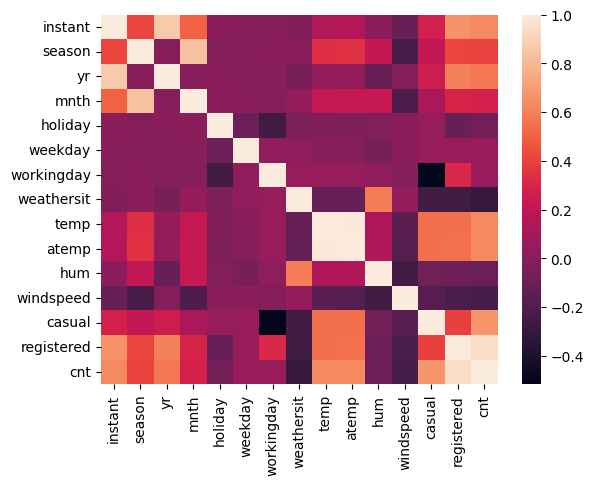

In [14]:
sns.heatmap(df.corr())

In [15]:
x = df[['atemp','temp','yr','season','casual']]
y = df['cnt']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [18]:
mlr.fit(X_train,y_train)
y_pred = mlr.predict(X_test)
print("Predection for test set : {}".format(y_pred))

Predection for test set : [6558.26216265 6367.57528589 3538.72751454 4751.65309979 4066.33962478
 3298.87245689 4808.33518086 4447.8561861  7644.64824644 4837.36311604
 6415.91493122 7779.99852345 3604.73512422 5388.32361675 3438.23123594
 6762.76563651 4539.65277222  856.96709568 4684.91076351 4739.70942864
 6690.10839799 3836.69568204 7732.96595814 1367.04669654 3631.31355336
 3773.07702269 6601.63905131 3990.99645365 7572.07206231 4825.96260592
 7138.23931437 6249.48958699 3874.91659377 5594.42300166 3232.68566313
 3789.31834618 5259.6191905  6689.19284003 1366.23381758 4159.2473154
 3981.63885685 2968.47109402 5082.47266101 5392.27747517 4233.75992264
 7973.4239454  1835.08446605 4270.49522948 4703.65817392 2824.85215888
 6418.43382973 4681.510875   4435.89099784 7872.00497486 3204.52432638
 7385.06175024 5234.01593055 5659.19018271 3398.57636867 5706.45230498
 3689.83942744 5196.02722863 1240.89525443 4409.313599   5605.44104003
 4516.6527005  7032.99016062 4767.22563198 3532.8880

In [19]:
print("Intercept: ",mlr.intercept_)
print("Coffecients: ")
list(zip(x,mlr.coef_))

Intercept:  -238.68369400565462
Coffecients: 


[('atemp', 95.11284610946012),
 ('temp', -4.756166868791839),
 ('yr', 1830.0869146644231),
 ('season', 371.83320485687796),
 ('casual', 0.8674267980486845)]

In [20]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, y_pred)
meanAbErr=metrics.mean_absolute_error(y_test,y_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',meanAbErr)
print('Mean squared Error: ',meanSqErr)
print("R2 : ",r2_score)

Mean Absolute Error:  637.9407409411293
Mean squared Error:  638776.9001743771
R2 :  0.8119266894001522


House Price Prediction

In [21]:
house = pd.read_csv('/content/Housing.csv')

In [22]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
house['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [24]:
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['guestroom'] = house['guestroom'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})
house['hotwaterheating'] = house['hotwaterheating'].map({'yes': 1, 'no': 0})
house['airconditioning'] = house['airconditioning'].map({'yes': 1, 'no': 0})
house['prefarea'] = house['prefarea'].map({'yes': 1, 'no': 0})
house['furnishingstatus'] = house['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0,'unfurnished':-1})

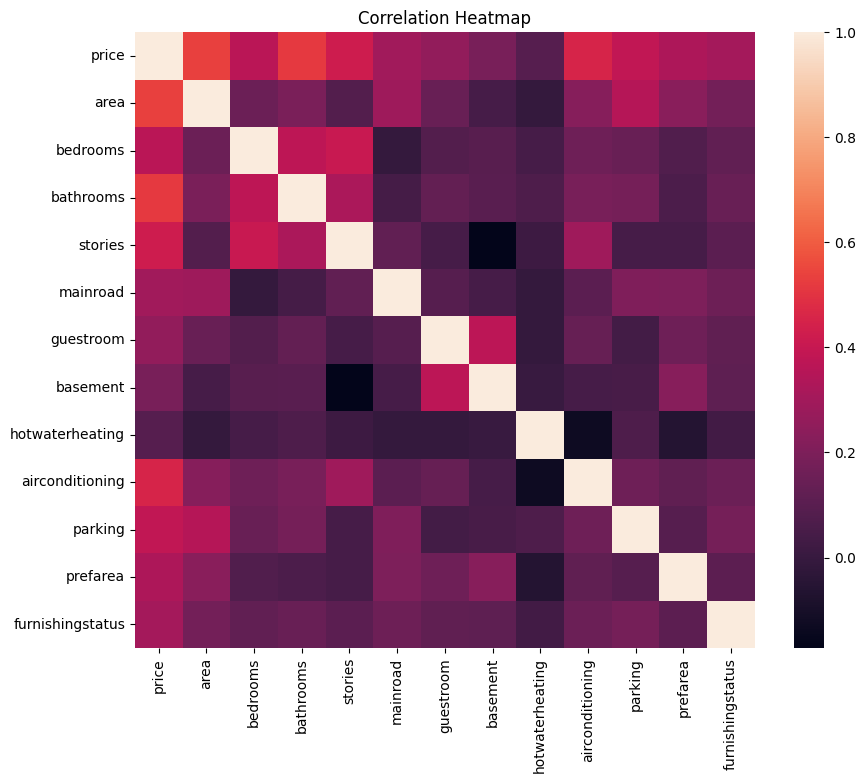

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(house.corr())
plt.title('Correlation Heatmap')
plt.show()

In [26]:
x = house[['area','bathrooms','stories','airconditioning','parking','furnishingstatus','prefarea','mainroad','bedrooms']]
y = house['price']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=100)

In [28]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [29]:
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction of testing: {}".format(y_pred_mlr))

Prediction of testing: [ 4383864.64033806  6487997.21813684  5753717.21873263  4860334.29986299
  4568745.61089766  4143219.43920144  8420130.06555589  5500196.17754148
  3249625.50543305  5885440.2659159   2756515.40971713  6402367.83043083
  5175147.59589808  6990954.28292161  5094270.50318736  7277254.09792999
  9056403.61091911  4059458.13642894  6192571.37797213  4735743.94841697
  4036536.744694    2111189.28019795  5046252.4041221   3504497.3457336
  2552543.02271756  3224666.46946369  5380444.99814918  6981002.16120754
  6839956.05917486  4990445.82654048  3245239.95327031  4396856.78833203
  2849312.88165186  2634315.71151377  5376711.63980289  4141984.94803148
  4486289.93805823  3550472.82988109  3452788.29855295  3769945.01170305
  2346439.0634047   6129635.34958788  5920336.47318987  2945502.29534166
  2501771.66555507  4842712.29329109  4231811.19531897  5716227.87177565
  3211585.66979615  6212099.97307696  1812324.75871044  6632721.67452123
  5936346.38961678  6877115.2

In [31]:
print("Intercept: ",mlr.intercept_)
print("Coffecients: ")
list(zip(x,mlr.coef_))

Intercept:  -231808.1510296706
Coffecients: 


[('area', 195.27445062496903),
 ('bathrooms', 1298647.3239416068),
 ('stories', 521840.4100365808),
 ('airconditioning', 680958.1030398988),
 ('parking', 448810.07276325347),
 ('furnishingstatus', 411091.4008005279),
 ('prefarea', 933539.2078958867),
 ('mainroad', 677683.13379148),
 ('bedrooms', 33243.96262189589)]

In [32]:
from sklearn import metrics
meanAbsErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)

print("R square : ",mlr.score(x,y))
print('Mean absolute Error', meanAbsErr)
print("Mean Squared Error", meanSqErr)
print("RMSE :", rootMeanSqErr)

R square :  0.6325068119454076
Mean absolute Error 843895.4101384309
Mean Squared Error 1240455734907.6501
RMSE : 1113757.4847818757
